# Basic Thing to Plot the MCP gain curves

In [1]:
import pandas as pd
import pyMAP as pm
%matplotlib notebook

Define function to load all data of the desired type from repo

In [2]:
def all_data(csv_repo,dat_load = ['ILO_IFB','ILO_TOF_BD','ILO_RAW_CNT','TOF_DE_sample']):
    # Separately load each data file and accumulate to master data frame
    stuff = pd.concat([pm.data.load(csv_repo,
                dtype = dt) for dt in dat_load],
                      axis =1,sort = True)
    stuff.dropna(subset = dat_load,inplace = True)
    return(stuff)

def integrate_dat(stuff,rebase = 'TOF_DE_sample'):
    # Combine desired housekeeping data to direct event data frame
    int_cols = {
            'ILO_IFB':['PAC_VSET', 'PAC_OCP', 'MCP_VSET', 'MCP_OCP',
                        'OSCOPE_CH1', 'OSCOPE_CH0','TEMP1', 'TEMP0', 
                       'V5P0_VM', 'V3P3_VM', 'V12P0_VM', 'V12N0_VM',
                       'LV_CM', 'LV_VM', 'LV_TEMP', 'MCP_CM', 'MCP_VM', 
                       'MCP_TEMP', 'PAC_CM','PAC_VM', 'PAC_TEMP', 
                       'V5P0ANA_VM', 'V2P5_VM', 'PAC_VSET_MON', 'PAC_OCP_MON', 
                       'MCP_VSET_MON', 'MCP_OCP_MON'],
            'ILO_TOF_BD':['TOF_P5_VM', 'TOF_P6_VM', 'AN_A_THR_REG', 'AN_B0_THR_REG',
                           'AN_B3_THR_REG', 'AN_C_THR_REG','AN_TOF3_THR_REG', 'AN_TOF2_THR_REG',
                           'AN_TOF1_THR_REG', 'AN_TOF0_THR_REG']
           }
    stuff['dat'] = stuff.apply(lambda x: pm.data.combiner(x[rebase],[x[l][col] for l,col in int_cols.items()],'index_norm'),axis =1)
    return(stuff)

In [3]:
df = all_data('../Test Data/csv/',['ILO_IFB','ILO_TOF_BD','ILO_RAW_CNT'])

Loading ../Test Data/csv/Aliveness_120122_20221201_ILO_IFB.csv
Loading ../Test Data/csv/EMV1_FunctionalTest_20221205_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_functional_test_120222_2_20221202_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_functional_test_120222_3_20221202_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_functional_test_120222_5_20221202_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_functional_test_20221205_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_functional_test_power_on_20221202_ILO_IFB.csv
Loading ../Test Data/csv/EMV1_OCP_20221205_ILO_IFB.csv
Loading ../Test Data/csv/EMV1_PAC_Func_20221206_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_PaC_Ramp_to_16kV_20221206_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_Power ON 2_20221201_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_power_on_sequence_20221201_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_startup_20221206_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_TOF_functional_test_20221201_ILO_IFB.csv
Loading ../Test Data/csv/EMv1_TOF_functional_test_2_2022

In [5]:
df = integrate_dat(df,rebase = 'ILO_RAW_CNT')

# Plot The count rate and efficiency variation for Desired MCP Gain Test

select desired run

In [15]:
def multi_run(df,runs = [],use_x = ['MCP_VSET','MCP_VM'],
                  yplt = ['Eff_B']):
    # Plots single y for multiple runs
    
    for x in use_x:
        fig,ax = plt.subplots()
        for r in runs: 
            dat = df.xs(r)['dat']
            ax.plot(dat.groupby(x).mean()[yplt],label = r)
        ax.set_ylabel(yplt)
        ax.set_xlabel(x)
        pm.bowPy.plotJon.legend.legend_loc(fig,ax,location = 'above')

def multi_val(df,runs = [],use_x = ['MCP_VSET','MCP_VM'],
                  yplt = ['TOF0','TOF1','TOF2','TOF3','SILVER']):
    # Combines runs and and plots multiple yplt values
    dat = pd.concat(df.T[runs].T['dat'].values,axis = 0)

    for x in use_x:
        fig,ax = plt.subplots()
        for y in yplt:
            ax.plot(dat.groupby(x).mean()[y],label = y)
        ax.set_xlabel(x)
        pm.bowPy.plotJon.legend.legend_loc(fig,ax,location = 'right')
    return(fig,ax)

Combine both runs and plot all efficiencies

<IPython.core.display.Javascript object>


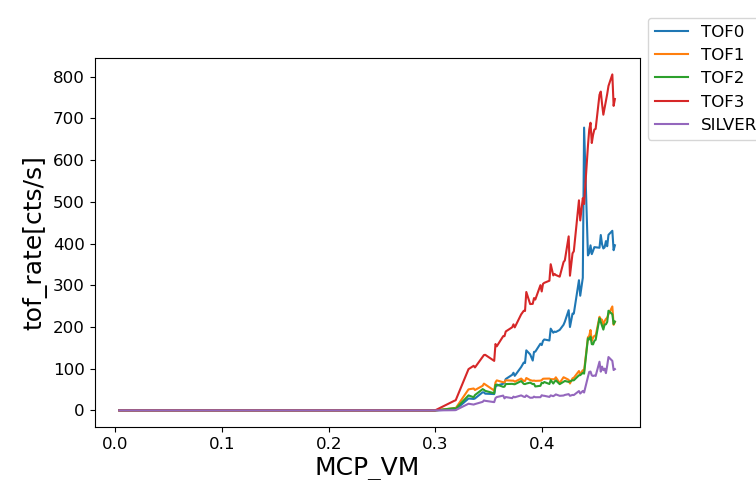

<IPython.core.display.Javascript object>


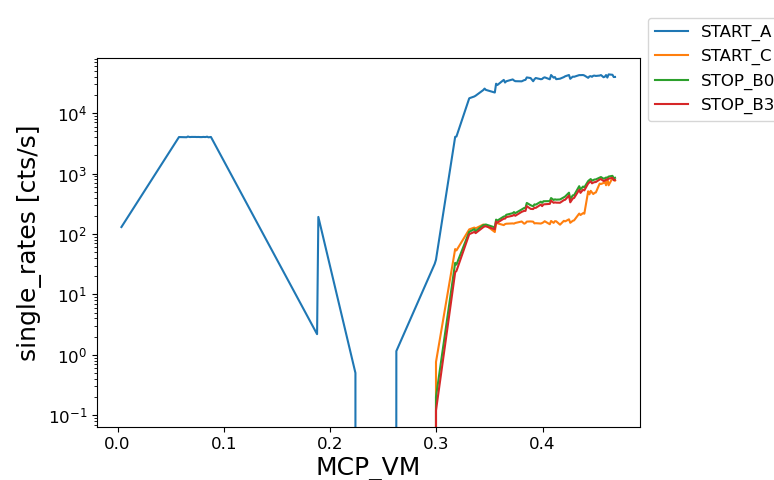

<IPython.core.display.Javascript object>


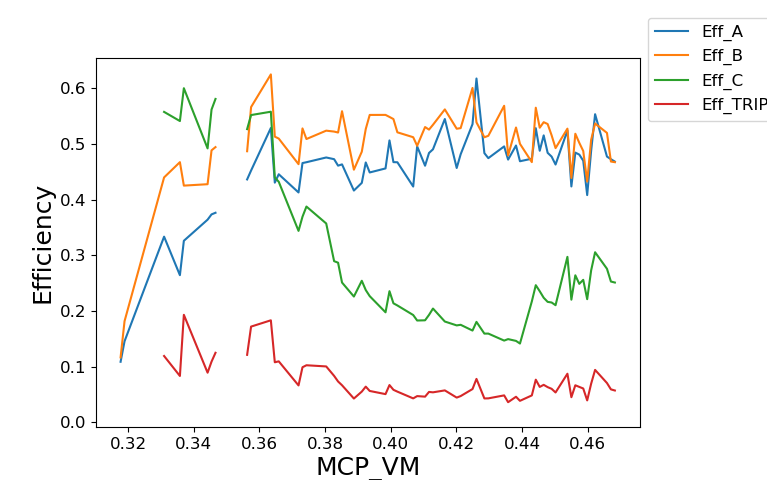

[]

In [23]:
dat_nam = ['emv1_unhsplat_tof_functional_mcp_gain2_20221206_']

plt_grps = {'tof_rate[cts/s]':['TOF0','TOF1','TOF2','TOF3','SILVER'],
                'single_rates [cts/s]':['START_A', 'START_C', 'STOP_B0', 'STOP_B3'],
                'Efficiency':['Eff_A','Eff_B','Eff_C','Eff_TRIP']} 
axss = []
for lab,vals in plt_grps.items():
    fig,ax = multi_val(df,runs = dat_nam,
                  use_x = ['MCP_VM'],
                  yplt = vals)
    ax.set_ylabel(lab)
    axss.append(ax)
axss[1].semilogy()